# MNIST Handwritten Digit Classifier - Simple Neural Network

**Built with Claude Code - Agentic AI Tool**

This notebook demonstrates a basic feedforward neural network for MNIST digit classification:
- **Architecture**: Input (784) → Dense(128, ReLU) → Output(10, Softmax)
- **Concepts**: Fully connected layers, ReLU activation, Softmax, Backpropagation, Loss function
- **Complete metrics and visualizations**

## 1. Import Required Libraries

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics and evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


## 2. Load and Explore MNIST Dataset

In [2]:
# Load MNIST dataset (automatically downloads if not present)
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"\nDataset Shape:")
print(f"Training images: {X_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test images: {X_test.shape}")
print(f"Test labels: {y_test.shape}")

print(f"\nPixel value range: [{X_train.min()}, {X_train.max()}]")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Classes: {np.unique(y_train)}")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Dataset Shape:
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)

Pixel value range: [0, 255]
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize Sample Images

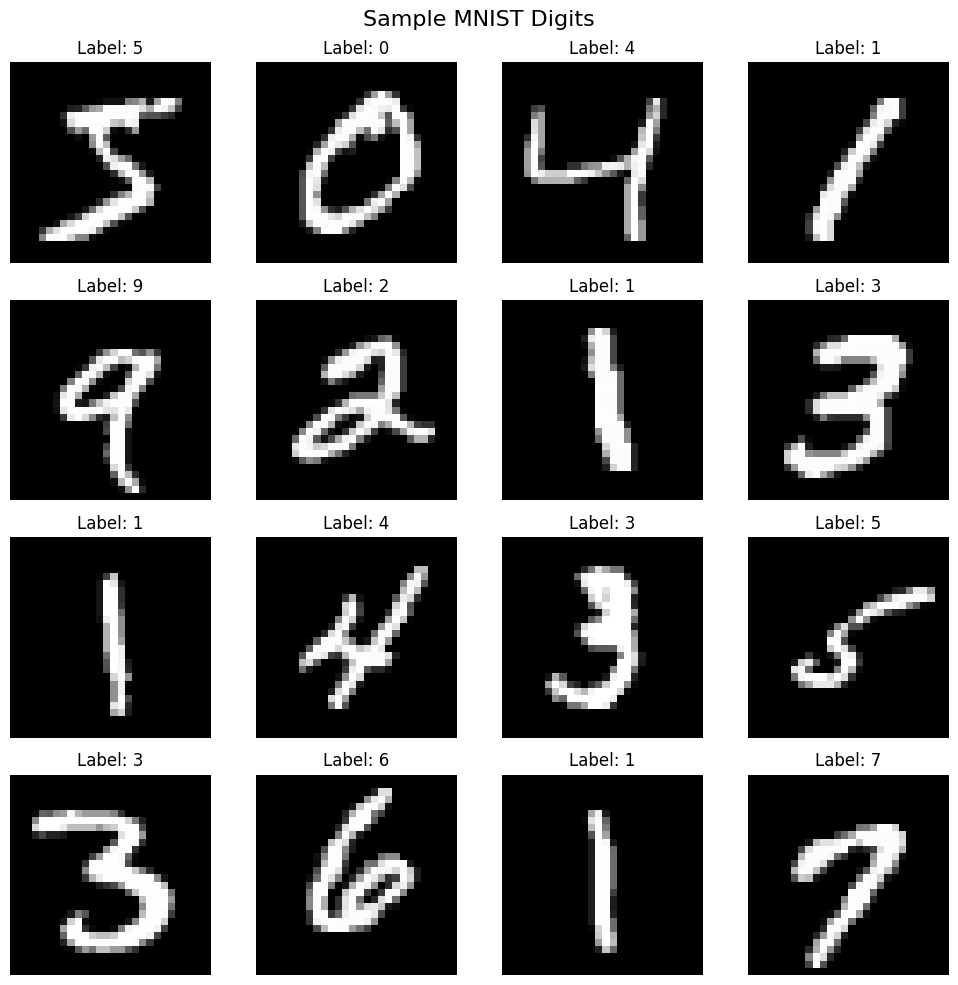

In [3]:
# Display 16 sample images from training set
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Sample MNIST Digits', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [4]:
# Flatten images from 28x28 to 784-dimensional vectors
X_train_flattened = X_train.reshape(-1, 784).astype('float32')
X_test_flattened = X_test.reshape(-1, 784).astype('float32')

# Normalize pixel values to [0, 1] range
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

# One-hot encode labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print("Preprocessing completed!")
print(f"X_train shape: {X_train_normalized.shape} (60000 samples, 784 features)")
print(f"y_train shape: {y_train_categorical.shape} (60000 samples, 10 classes)")
print(f"X_test shape: {X_test_normalized.shape} (10000 samples, 784 features)")
print(f"y_test shape: {y_test_categorical.shape} (10000 samples, 10 classes)")

Preprocessing completed!
X_train shape: (60000, 784) (60000 samples, 784 features)
y_train shape: (60000, 10) (60000 samples, 10 classes)
X_test shape: (10000, 784) (10000 samples, 784 features)
y_test shape: (10000, 10) (10000 samples, 10 classes)


## 5. Build Simple Neural Network

### Architecture:
- **Input Layer**: 784 neurons (28×28 flattened image)
- **Hidden Layer**: 128 neurons with ReLU activation
- **Output Layer**: 10 neurons with Softmax activation (one per digit class)

### Key Concepts:
- **Dense (Fully Connected) Layers**: Every neuron connects to every neuron in the next layer
- **ReLU Activation**: Rectified Linear Unit, f(x) = max(0, x) - introduces non-linearity
- **Softmax Activation**: Converts outputs to probability distribution (sums to 1)
- **Weights & Biases**: Learned parameters updated via backpropagation

In [5]:
def create_simple_nn():
    """
    Create a simple feedforward neural network with 1 hidden layer.

    Architecture: Input(784) → Dense(128, ReLU) → Output(10, Softmax)
    """
    model = models.Sequential([
        # Hidden layer: 128 neurons with ReLU activation
        layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer'),

        # Output layer: 10 neurons (one per digit) with Softmax activation
        layers.Dense(10, activation='softmax', name='output_layer')
    ])

    return model

# Create the model
model = create_simple_nn()

# Display model architecture
print("\nModel Architecture:")
print("="*60)
model.summary()
print("="*60)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Compile the Model

### Training Components:
- **Optimizer**: Adam (Adaptive Moment Estimation) - handles backpropagation and weight updates
- **Loss Function**: Categorical Cross-Entropy - measures difference between predicted and actual probabilities
- **Metrics**: Accuracy, Precision, Recall - track model performance

In [6]:
# Compile model with optimizer, loss function, and metrics
model.compile(
    optimizer='adam',  # Adam optimizer for efficient backpropagation
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

print("Model compiled successfully!")
print("\nTraining will use:")
print("- Optimizer: Adam (learning rate: 0.001)")
print("- Loss: Categorical Cross-Entropy")
print("- Backpropagation: Automatic via TensorFlow")

Model compiled successfully!

Training will use:
- Optimizer: Adam (learning rate: 0.001)
- Loss: Categorical Cross-Entropy
- Backpropagation: Automatic via TensorFlow


## 7. Set Up Training Callbacks

In [7]:
# Define callbacks for training optimization
callbacks = [
    # Early stopping: Stop training if validation loss doesn't improve
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

print("Training callbacks configured!")

Training callbacks configured!


## 8. Train the Neural Network

### Training Process:
1. **Forward Propagation**: Input data flows through the network
2. **Loss Calculation**: Compare predictions with actual labels
3. **Backpropagation**: Calculate gradients of loss with respect to weights
4. **Weight Update**: Adjust weights using Adam optimizer to minimize loss
5. **Repeat** for each batch and epoch

In [8]:
# Train the model
print("Starting training...\n")
print("Process: Forward Pass → Loss Calculation → Backpropagation → Weight Update")
print("="*70)

history = model.fit(
    X_train_normalized,
    y_train_categorical,
    epochs=20,
    batch_size=128,
    validation_split=0.1,  # Use 10% of training data for validation
    callbacks=callbacks,
    verbose=1
)

print("\n" + "="*70)
print("Training completed!")

Starting training...

Process: Forward Pass → Loss Calculation → Backpropagation → Weight Update
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8284 - loss: 0.6406 - precision: 0.9309 - recall: 0.6881 - val_accuracy: 0.9553 - val_loss: 0.1701 - val_precision: 0.9673 - val_recall: 0.9460 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9452 - loss: 0.1911 - precision: 0.9587 - recall: 0.9332 - val_accuracy: 0.9630 - val_loss: 0.1269 - val_precision: 0.9712 - val_recall: 0.9572 - learning_rate: 0.0010
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1343 - precision: 0.9699 - recall: 0.9526 - val_accuracy: 0.9703 - val_loss: 0.1071 - val_precision: 0.9763 - val_recall: 0.9630 - learning_rate: 0.0010
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1020 - precision: 0.9774 - recall: 0.9653 - val_accuracy: 0.9742 - val_loss: 0.0960 - val_precision: 0.9781 - val_recall

## 9. Visualize Training History

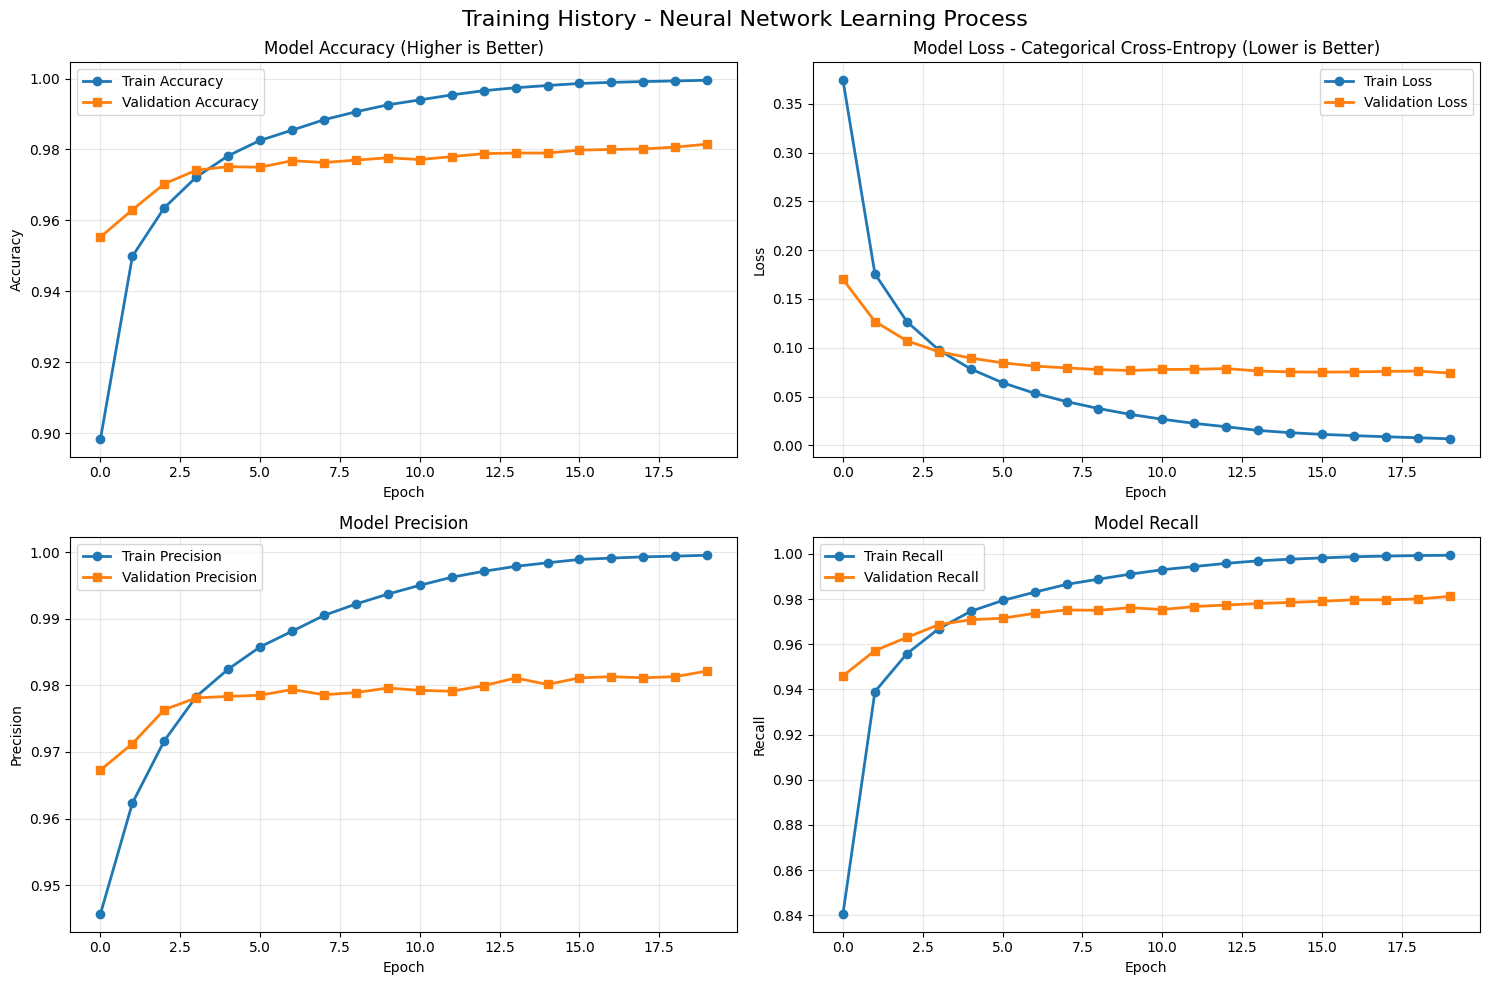


Key Observations:
- Accuracy increases as the network learns patterns
- Loss decreases as predictions get better
- Gap between train/val shows generalization


In [9]:
# Plot training and validation metrics over epochs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Training History - Neural Network Learning Process', fontsize=16)

# Accuracy over epochs
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, marker='o')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Model Accuracy (Higher is Better)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss over epochs
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2, marker='o')
axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, marker='s')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Model Loss - Categorical Cross-Entropy (Lower is Better)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision over epochs
axes[1, 0].plot(history.history['precision'], label='Train Precision', linewidth=2, marker='o')
axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2, marker='s')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Model Precision')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall over epochs
axes[1, 1].plot(history.history['recall'], label='Train Recall', linewidth=2, marker='o')
axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2, marker='s')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Model Recall')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Accuracy increases as the network learns patterns")
print("- Loss decreases as predictions get better")
print("- Gap between train/val shows generalization")

## 10. Evaluate on Test Set

In [10]:
# Evaluate model on unseen test data
print("Evaluating model on test set (unseen data)...\n")

test_results = model.evaluate(X_test_normalized, y_test_categorical, verbose=0)

print("\n" + "="*60)
print("TEST SET PERFORMANCE")
print("="*60)
print(f"Test Loss (Cross-Entropy): {test_results[0]:.4f}")
print(f"Test Accuracy:             {test_results[1]:.4f} ({test_results[1]*100:.2f}%)")
print(f"Test Precision:            {test_results[2]:.4f}")
print(f"Test Recall:               {test_results[3]:.4f}")
print("="*60)

Evaluating model on test set (unseen data)...


TEST SET PERFORMANCE
Test Loss (Cross-Entropy): 0.0729
Test Accuracy:             0.9785 (97.85%)
Test Precision:            0.9801
Test Recall:               0.9778


## 11. Generate Predictions

In [11]:
# Generate predictions on test set
print("Generating predictions...\n")

# Get probability distributions for each sample
y_pred_probs = model.predict(X_test_normalized, verbose=0)

# Convert probabilities to class predictions (0-9)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print(f"Predictions generated for {len(y_pred_classes)} test samples")
print(f"\nExample prediction (first test sample):")
print(f"True label: {y_test[0]}")
print(f"Predicted label: {y_pred_classes[0]}")
print(f"Confidence: {y_pred_probs[0][y_pred_classes[0]]*100:.2f}%")
print(f"\nProbability distribution for first sample:")
for i, prob in enumerate(y_pred_probs[0]):
    print(f"  Digit {i}: {prob*100:5.2f}%")

Generating predictions...

Predictions generated for 10000 test samples

Example prediction (first test sample):
True label: 7
Predicted label: 7
Confidence: 99.99%

Probability distribution for first sample:
  Digit 0:  0.00%
  Digit 1:  0.00%
  Digit 2:  0.00%
  Digit 3:  0.01%
  Digit 4:  0.00%
  Digit 5:  0.00%
  Digit 6:  0.00%
  Digit 7: 99.99%
  Digit 8:  0.00%
  Digit 9:  0.00%


## 12. Comprehensive Classification Metrics

In [12]:
# Calculate detailed metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("\n" + "="*60)
print("DETAILED CLASSIFICATION METRICS")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} (How many predicted positives are correct)")
print(f"Recall:    {recall:.4f} (How many actual positives were found)")
print(f"F1-Score:  {f1:.4f} (Harmonic mean of Precision & Recall)")
print("="*60)

# Detailed classification report per class
print("\n" + "="*70)
print("PER-CLASS CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred_classes,
                          target_names=[f'Digit {i}' for i in range(10)]))
print("="*70)


DETAILED CLASSIFICATION METRICS
Accuracy:  0.9785 (97.85%)
Precision: 0.9785 (How many predicted positives are correct)
Recall:    0.9785 (How many actual positives were found)
F1-Score:  0.9785 (Harmonic mean of Precision & Recall)

PER-CLASS CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Digit 0       0.98      0.99      0.99       980
     Digit 1       0.99      0.99      0.99      1135
     Digit 2       0.97      0.98      0.98      1032
     Digit 3       0.97      0.98      0.98      1010
     Digit 4       0.98      0.98      0.98       982
     Digit 5       0.98      0.97      0.98       892
     Digit 6       0.99      0.98      0.98       958
     Digit 7       0.97      0.98      0.97      1028
     Digit 8       0.97      0.97      0.97       974
     Digit 9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      

## 13. Confusion Matrix Visualization

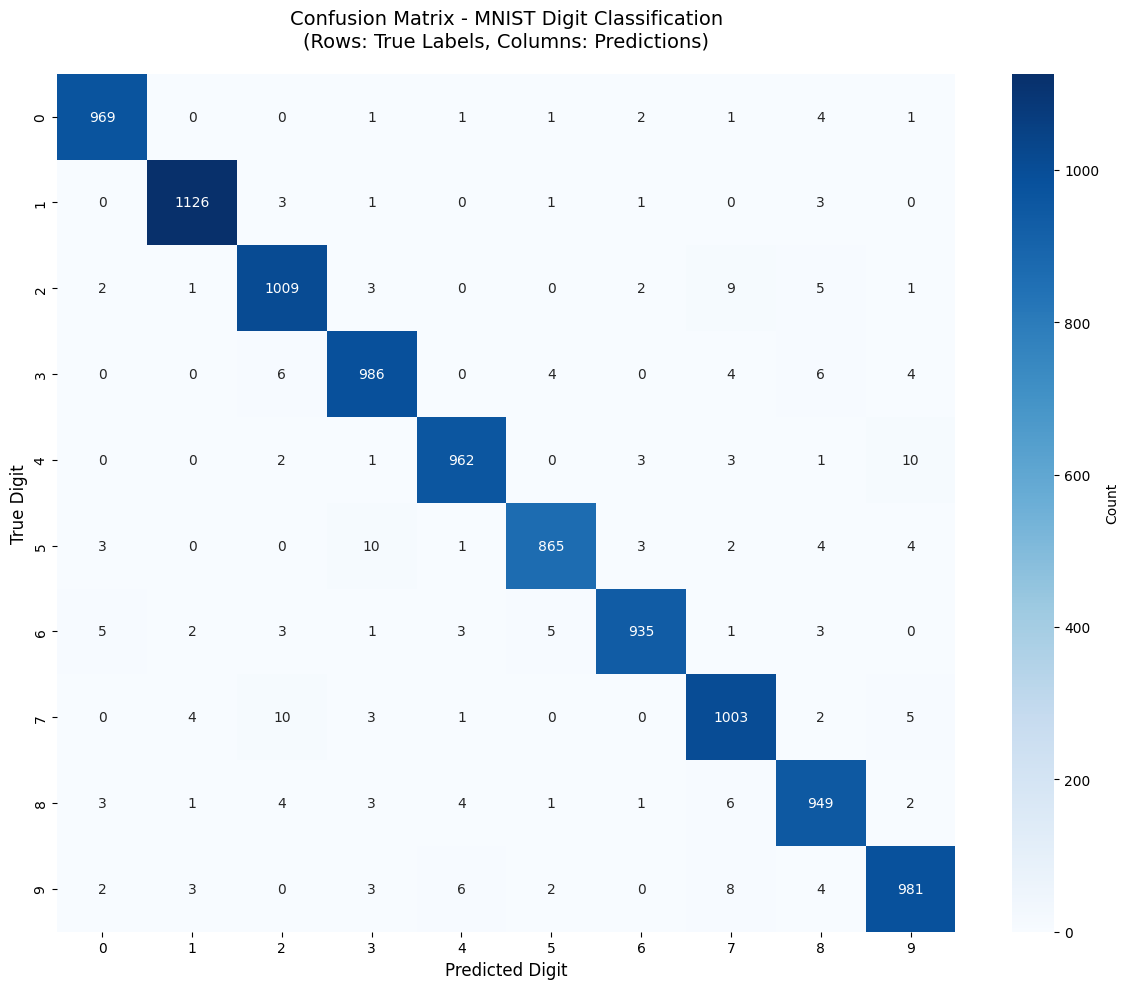


How to read the Confusion Matrix:
- Diagonal (blue): Correct predictions
- Off-diagonal: Misclassifications
- Darker blue = More samples


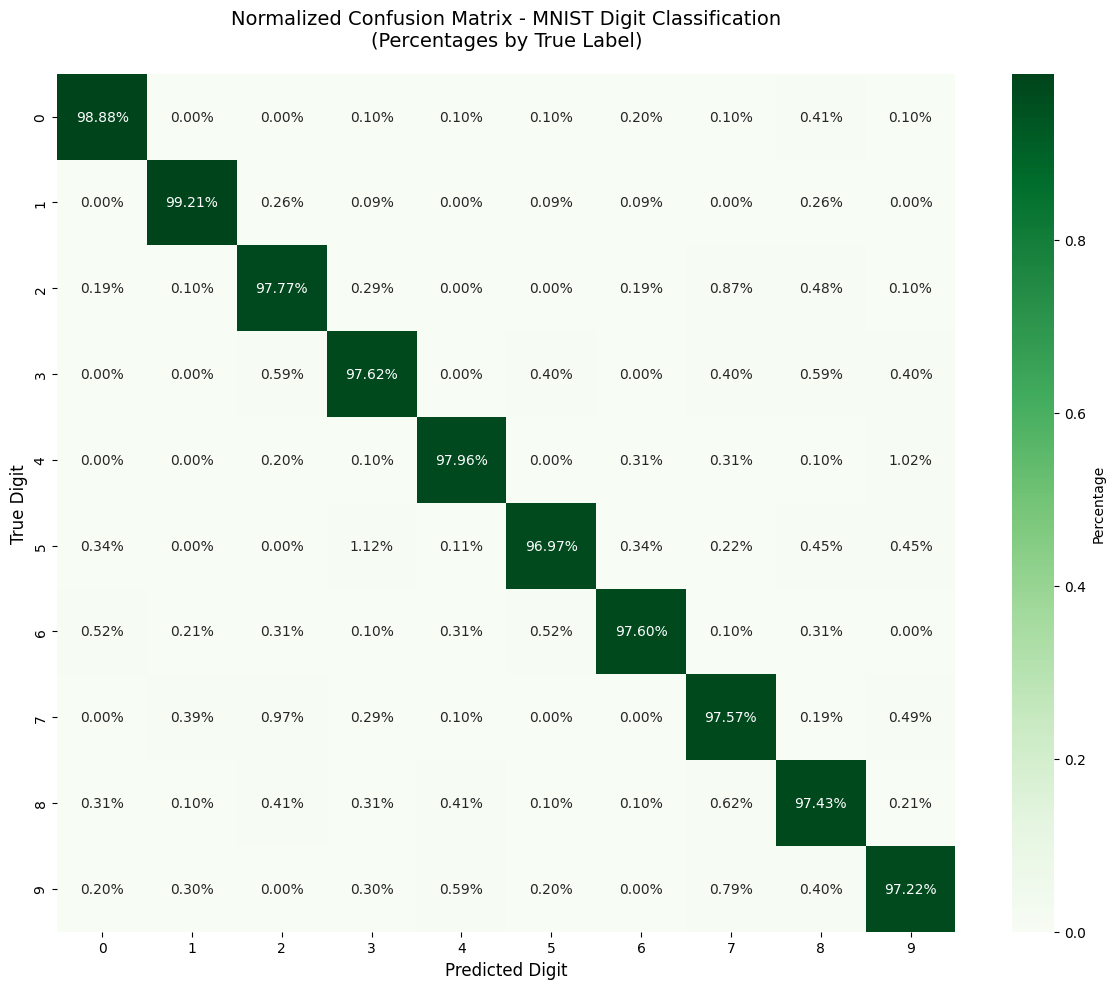

In [13]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot raw confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - MNIST Digit Classification\n(Rows: True Labels, Columns: Predictions)',
         fontsize=14, pad=20)
plt.xlabel('Predicted Digit', fontsize=12)
plt.ylabel('True Digit', fontsize=12)
plt.tight_layout()
plt.show()

print("\nHow to read the Confusion Matrix:")
print("- Diagonal (blue): Correct predictions")
print("- Off-diagonal: Misclassifications")
print("- Darker blue = More samples")

# Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Percentage'})
plt.title('Normalized Confusion Matrix - MNIST Digit Classification\n(Percentages by True Label)',
         fontsize=14, pad=20)
plt.xlabel('Predicted Digit', fontsize=12)
plt.ylabel('True Digit', fontsize=12)
plt.tight_layout()
plt.show()

## 14. Visualize Sample Predictions

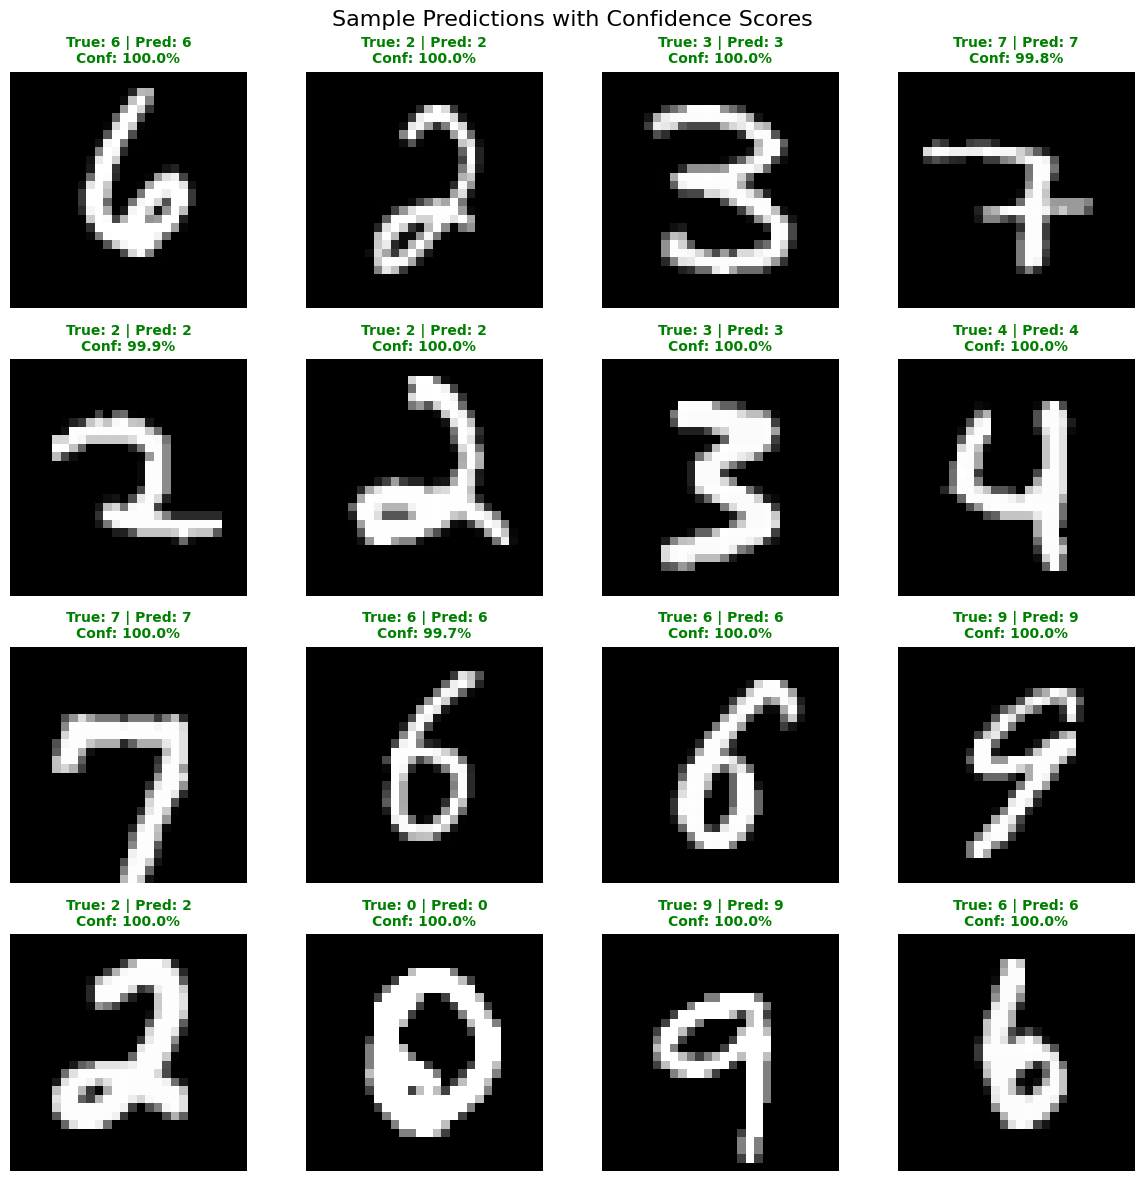

In [14]:
# Display sample predictions with confidence scores
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Sample Predictions with Confidence Scores', fontsize=16)

# Get random samples
indices = np.random.choice(len(X_test), 16, replace=False)

for i, (ax, idx) in enumerate(zip(axes.flat, indices)):
    ax.imshow(X_test[idx], cmap='gray')

    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]
    confidence = y_pred_probs[idx][pred_label] * 100

    # Green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'

    ax.set_title(f'True: {true_label} | Pred: {pred_label}\nConf: {confidence:.1f}%',
                color=color, fontsize=10, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 15. Analyze Misclassifications


MISCLASSIFICATION ANALYSIS
Total misclassified: 215 out of 10000
Error rate: 2.15%
Correct predictions: 9785


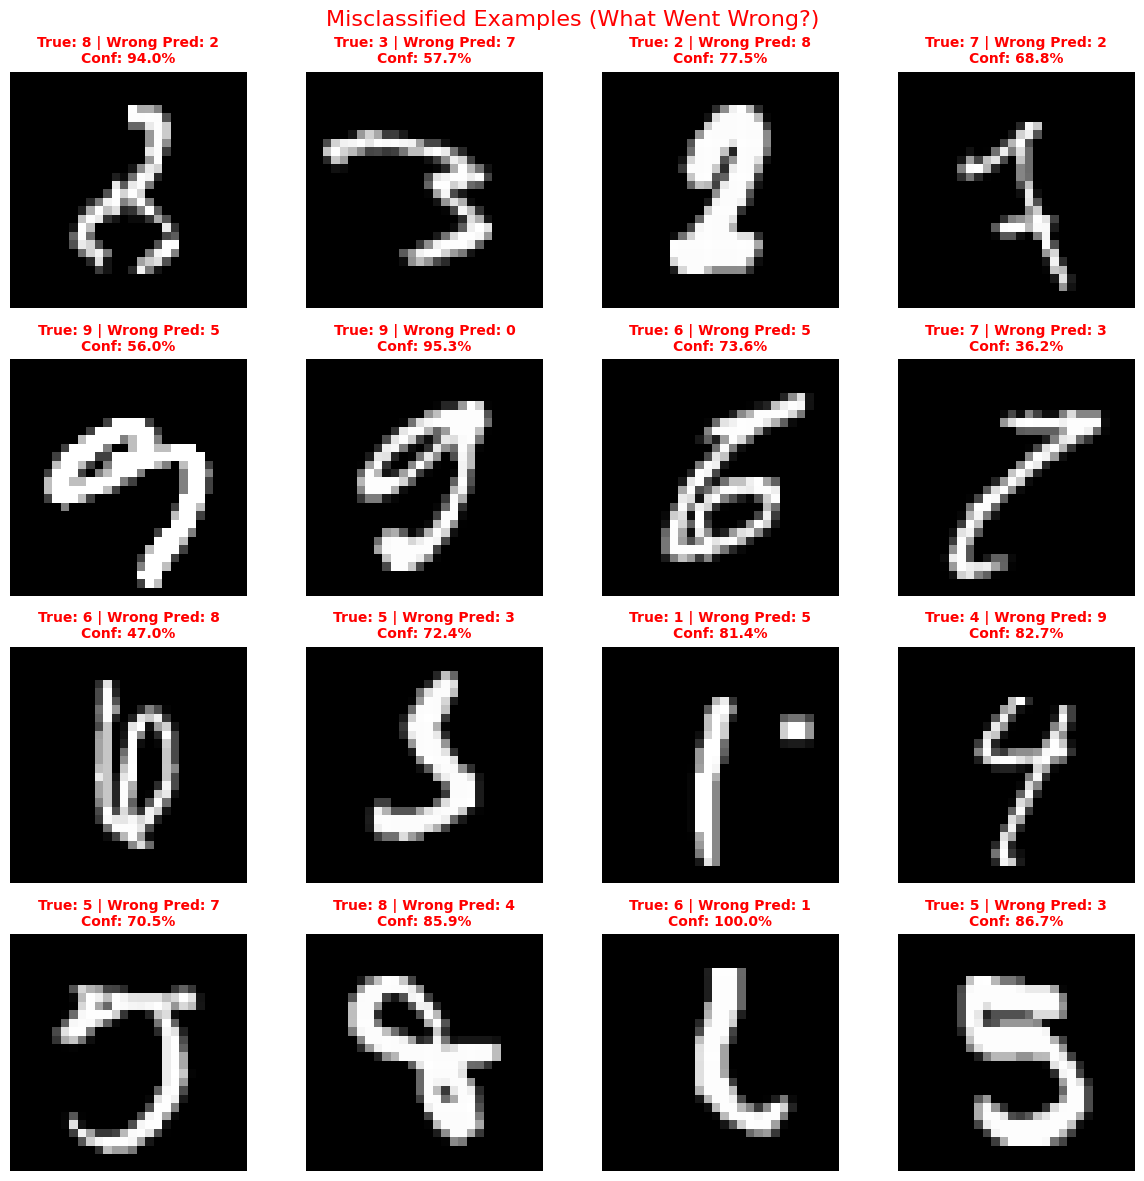


Common reasons for misclassification:
- Similar-looking digits (4 vs 9, 3 vs 8, 5 vs 6)
- Poor handwriting quality
- Ambiguous or unusual writing styles


In [15]:
# Find and analyze misclassified samples
misclassified_indices = np.where(y_test != y_pred_classes)[0]
num_misclassified = len(misclassified_indices)

print("\n" + "="*60)
print("MISCLASSIFICATION ANALYSIS")
print("="*60)
print(f"Total misclassified: {num_misclassified} out of {len(y_test)}")
print(f"Error rate: {(num_misclassified/len(y_test))*100:.2f}%")
print(f"Correct predictions: {len(y_test) - num_misclassified}")
print("="*60)

if num_misclassified > 0:
    # Display misclassified examples
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    fig.suptitle('Misclassified Examples (What Went Wrong?)', fontsize=16, color='red')

    sample_misclassified = np.random.choice(misclassified_indices,
                                           min(16, num_misclassified),
                                           replace=False)

    for i, (ax, idx) in enumerate(zip(axes.flat, sample_misclassified)):
        ax.imshow(X_test[idx], cmap='gray')

        true_label = y_test[idx]
        pred_label = y_pred_classes[idx]
        confidence = y_pred_probs[idx][pred_label] * 100

        ax.set_title(f'True: {true_label} | Wrong Pred: {pred_label}\nConf: {confidence:.1f}%',
                    color='red', fontsize=10, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nCommon reasons for misclassification:")
    print("- Similar-looking digits (4 vs 9, 3 vs 8, 5 vs 6)")
    print("- Poor handwriting quality")
    print("- Ambiguous or unusual writing styles")

## 16. Per-Class Accuracy Analysis


PER-DIGIT ACCURACY
Digit 0: 0.9888 (98.88%)
Digit 1: 0.9921 (99.21%)
Digit 2: 0.9777 (97.77%)
Digit 3: 0.9762 (97.62%)
Digit 4: 0.9796 (97.96%)
Digit 5: 0.9697 (96.97%)
Digit 6: 0.9760 (97.60%)
Digit 7: 0.9757 (97.57%)
Digit 8: 0.9743 (97.43%)
Digit 9: 0.9722 (97.22%)


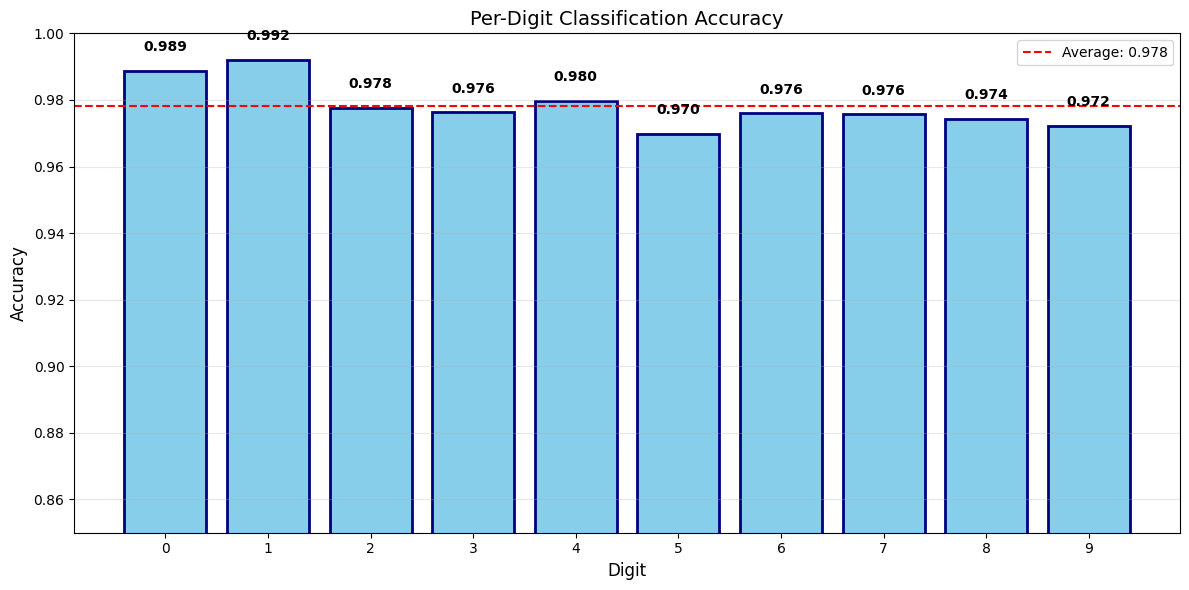


Best performing digit: 1 (0.9921)
Most challenging digit: 5 (0.9697)


In [16]:
# Calculate accuracy for each digit (0-9)
print("\n" + "="*60)
print("PER-DIGIT ACCURACY")
print("="*60)

per_class_accuracy = []
for digit in range(10):
    digit_mask = (y_test == digit)
    digit_accuracy = accuracy_score(y_test[digit_mask], y_pred_classes[digit_mask])
    per_class_accuracy.append(digit_accuracy)
    print(f"Digit {digit}: {digit_accuracy:.4f} ({digit_accuracy*100:.2f}%)")

print("="*60)

# Visualize per-class accuracy
plt.figure(figsize=(12, 6))
bars = plt.bar(range(10), per_class_accuracy, color='skyblue', edgecolor='navy', linewidth=2)
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Digit Classification Accuracy', fontsize=14)
plt.xticks(range(10))
plt.ylim([0.85, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, per_class_accuracy):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.3f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.axhline(y=np.mean(per_class_accuracy), color='r', linestyle='--',
           label=f'Average: {np.mean(per_class_accuracy):.3f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nBest performing digit: {np.argmax(per_class_accuracy)} ({max(per_class_accuracy):.4f})")
print(f"Most challenging digit: {np.argmin(per_class_accuracy)} ({min(per_class_accuracy):.4f})")

## 17. Final Summary and Key Takeaways


MNIST DIGIT CLASSIFIER - FINAL SUMMARY

📊 MODEL ARCHITECTURE:
----------------------------------------------------------------------
Type: Simple Feedforward Neural Network (1 Hidden Layer)
Input Layer: 784 neurons (28×28 flattened image)
Hidden Layer: 128 neurons with ReLU activation
Output Layer: 10 neurons with Softmax activation
Total Parameters: 101,770

🎓 KEY CONCEPTS DEMONSTRATED:
----------------------------------------------------------------------
✓ Forward Propagation: Data flows through layers
✓ Backpropagation: Gradients computed and weights updated
✓ ReLU Activation: Non-linear transformation in hidden layer
✓ Softmax Activation: Probability distribution in output layer
✓ Cross-Entropy Loss: Measures prediction error
✓ Adam Optimizer: Adaptive learning rate optimization
✓ Gradient Descent: Iterative weight optimization

📈 PERFORMANCE METRICS:
----------------------------------------------------------------------
Test Accuracy: 0.9785 (97.85%)
Precision (Weighted): 0.9785

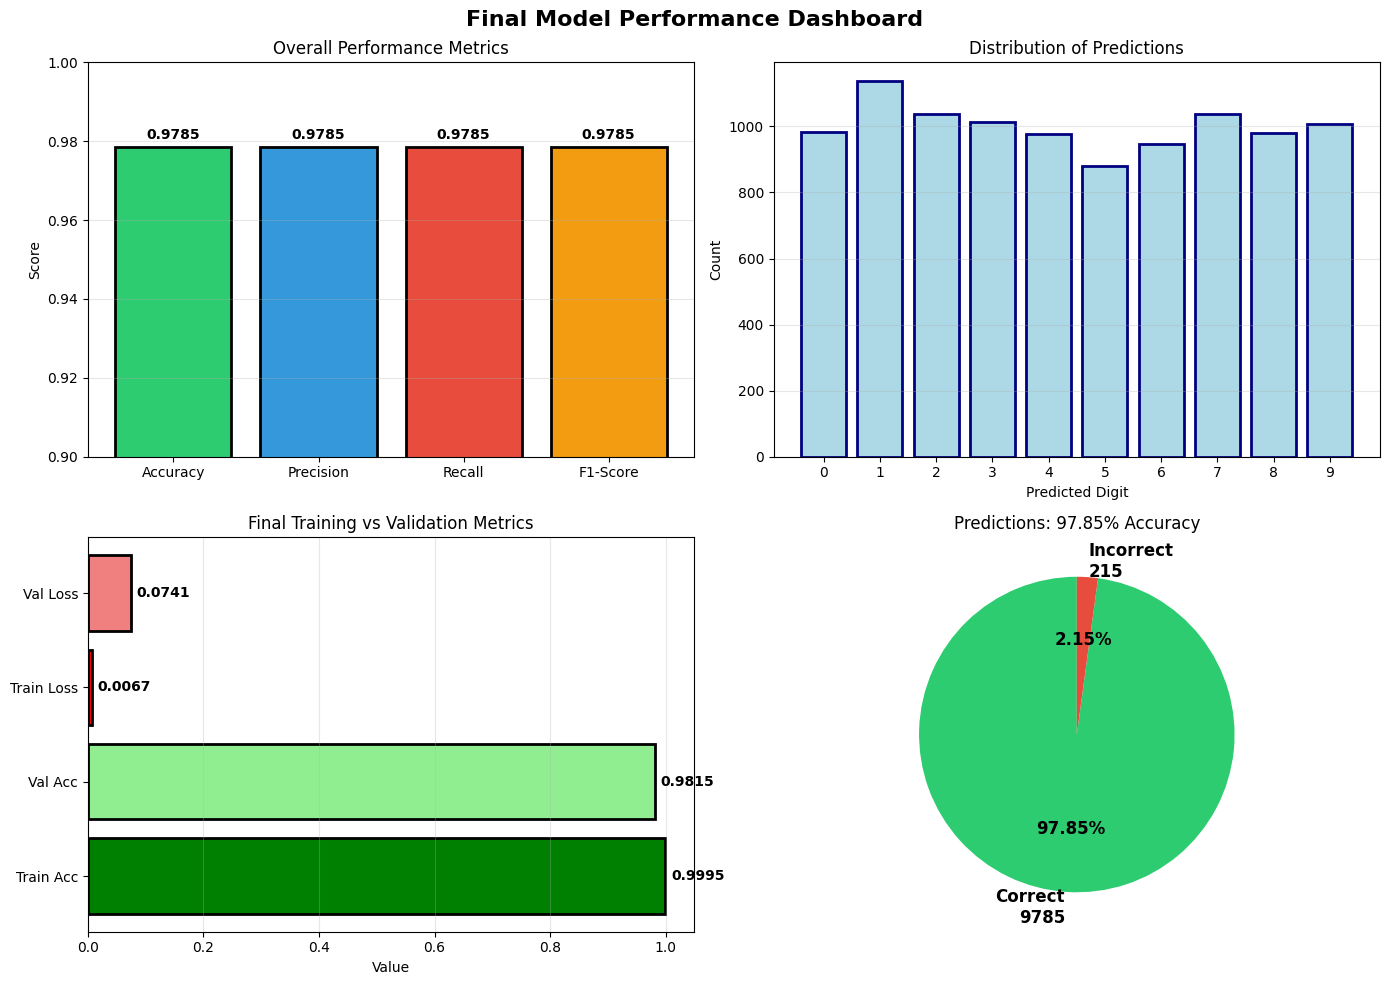

In [17]:
# Display final comprehensive summary
print("\n" + "="*70)
print("MNIST DIGIT CLASSIFIER - FINAL SUMMARY")
print("="*70)

print("\n📊 MODEL ARCHITECTURE:")
print("-" * 70)
print(f"Type: Simple Feedforward Neural Network (1 Hidden Layer)")
print(f"Input Layer: 784 neurons (28×28 flattened image)")
print(f"Hidden Layer: 128 neurons with ReLU activation")
print(f"Output Layer: 10 neurons with Softmax activation")
print(f"Total Parameters: {model.count_params():,}")

print("\n🎓 KEY CONCEPTS DEMONSTRATED:")
print("-" * 70)
print("✓ Forward Propagation: Data flows through layers")
print("✓ Backpropagation: Gradients computed and weights updated")
print("✓ ReLU Activation: Non-linear transformation in hidden layer")
print("✓ Softmax Activation: Probability distribution in output layer")
print("✓ Cross-Entropy Loss: Measures prediction error")
print("✓ Adam Optimizer: Adaptive learning rate optimization")
print("✓ Gradient Descent: Iterative weight optimization")

print("\n📈 PERFORMANCE METRICS:")
print("-" * 70)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")

print("\n📊 DATASET INFORMATION:")
print("-" * 70)
print(f"Training Samples: {len(X_train):,}")
print(f"Test Samples: {len(X_test):,}")
print(f"Classes: 10 (digits 0-9)")
print(f"Image Size: 28×28 pixels (grayscale)")

print("\n❌ ERROR ANALYSIS:")
print("-" * 70)
print(f"Misclassified Samples: {num_misclassified} / {len(y_test)}")
print(f"Error Rate: {(num_misclassified/len(y_test))*100:.2f}%")
print(f"Correct Predictions: {len(y_test) - num_misclassified:,}")

print("\n" + "="*70)
print("✅ Classification Complete!")
print("🤖 Built with Claude Code - Agentic AI Coding Tool")
print("📚 Demonstrates: Neural Networks, Backpropagation, Loss Functions")
print("="*70)

# Create a summary visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Final Model Performance Dashboard', fontsize=16, fontweight='bold')

# Metric bars
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
ax1.bar(metrics, values, color=colors, edgecolor='black', linewidth=2)
ax1.set_ylabel('Score')
ax1.set_title('Overall Performance Metrics')
ax1.set_ylim([0.9, 1.0])
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(values):
    ax1.text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold')

# Prediction distribution
unique, counts = np.unique(y_pred_classes, return_counts=True)
ax2.bar(unique, counts, color='lightblue', edgecolor='navy', linewidth=2)
ax2.set_xlabel('Predicted Digit')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Predictions')
ax2.set_xticks(range(10))
ax2.grid(axis='y', alpha=0.3)

# Training history - final epoch
final_metrics = ['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss']
final_values = [
    history.history['accuracy'][-1],
    history.history['val_accuracy'][-1],
    history.history['loss'][-1],
    history.history['val_loss'][-1]
]
colors2 = ['green', 'lightgreen', 'red', 'lightcoral']
ax3.barh(final_metrics, final_values, color=colors2, edgecolor='black', linewidth=2)
ax3.set_xlabel('Value')
ax3.set_title('Final Training vs Validation Metrics')
ax3.grid(axis='x', alpha=0.3)
for i, v in enumerate(final_values):
    ax3.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# Correct vs Incorrect pie chart
correct = len(y_test) - num_misclassified
sizes = [correct, num_misclassified]
labels = [f'Correct\n{correct}', f'Incorrect\n{num_misclassified}']
colors_pie = ['#2ecc71', '#e74c3c']
ax4.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.2f%%',
       startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax4.set_title(f'Predictions: {accuracy*100:.2f}% Accuracy')

plt.tight_layout()
plt.show()